In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV

In [7]:
X = np.linspace(-10, 10, 100)
X_plot = np.linspace(-10, 10, 100)

y_clear = np.sin(X) + X / 2
y = np.sin(X) + X / 2 + np.random.normal(0, .5, len(X))

X = pd.DataFrame(X)
X_plot = pd.DataFrame(X_plot)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predict_lr = model_lr.predict(X_test)
print(mse(predict_lr, y_test))
print(mae(predict_lr, y_test))
y_lr = model_lr.predict(X_plot)

0.8700938929398028
0.7819787939435112


In [9]:
params = {'n_estimators': list(range(50, 201, 10)),
         'max_depth': list(range(5, 17))}

clf = GridSearchCV(RandomForestRegressor(), params)
clf.fit(X_train, y_train)

y_rf = clf.best_estimator_.predict(X_plot)

In [10]:
params = {'max_depth':list(range(5, 15)),
         'n_estimators':list(range(50, 201, 10)),
          'verbose': [False]
         }

clf_cat = GridSearchCV(CatBoostRegressor(), params)
clf_cat.fit(X_train, y_train)

y_cat = clf_cat.best_estimator_.predict(X_plot)

In [11]:
model_tf = keras.Sequential([layers.Dense(input_shape=[1], units=100, activation='relu'),
                            layers.Dense(units=100, activation='relu'),
                            layers.Dense(units=100, activation='relu'),
                            layers.Dense(units=1)])

model_tf.compile(loss='mae', optimizer='adam')
history = model_tf.fit(X_train, y_train, epochs=20, verbose=False)

y_tf = model_tf.predict(X_plot)

4/4 [==============================] - 0s 3ms/step


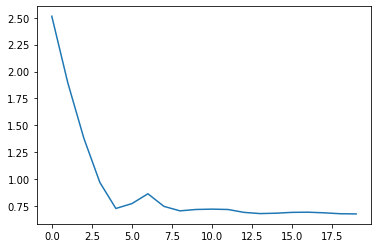

In [12]:
plt.plot(history.history['loss'])

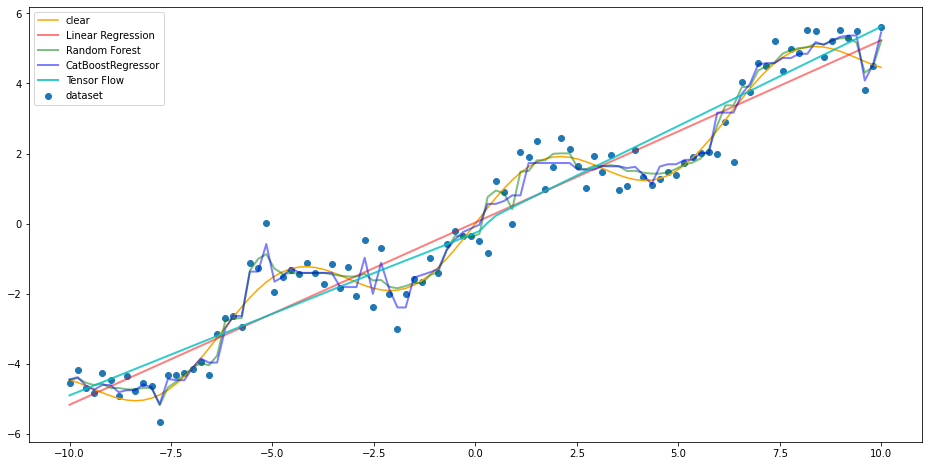

In [13]:
plt.figure(figsize=(16, 8))
plt.plot(X.values, y_clear, c='orange', label='clear')
plt.scatter(X.values, y, label='dataset')

plt.plot(X_plot.values, y_lr, c='red', label='Linear Regression', linewidth=2, alpha=.5)
plt.plot(X_plot.values, y_rf, c='green', label='Random Forest', linewidth=2, alpha=.5)
plt.plot(X_plot.values, y_cat, c='blue', label='CatBoostRegressor', linewidth=2, alpha=.5)
plt.plot(X_plot.values, y_tf, c='c', label='Tensor Flow', linewidth=2, alpha=.8)

plt.legend()